Романов К.Р. А-03-20\
Отчет по Лабораторной работе №1\
По курсу "Основы анализа тестовых данных"\
Проверил: Мохов А.С.

## Импортировать необходимые для работы библиотеки и модули

In [69]:
RANDOM_STATE = 66
# библиотека для работы с массивами
import numpy as np 

# Требуемые модули из sklearn
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [70]:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
        if ax is None:
            ax = plt.gca()
        if fill:
            ax.contourf(X1, X2, decision_values.reshape(X1.shape),
            levels=fill_levels, colors=['cyan', 'pink', 'yellow'])
        if line:
            ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())

## Загрузить данные в соответствие с вариантом

Номер по БАРС: 8 => Вариант 8.

* Вариант	8
* Вид классов	moons
* random_state	15
* noise 0.2

In [71]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=RANDOM_STATE)

## Вывести первые 15 элементов выборки (координаты точек и метки класса)

In [72]:
print ("Координаты точек: ") 
print (X[:15])
print ("Метки класса: ") 
print (y[:15])

Координаты точек: 
[[ 0.19550869  0.76324769]
 [ 2.0504424   0.41589536]
 [ 0.29334813 -0.17675229]
 [ 1.41552871 -0.23155051]
 [ 0.67955019  1.14694248]
 [ 0.76075765  0.79037278]
 [ 0.80954059  0.94700505]
 [-0.07839445 -0.09814591]
 [ 0.11224431  0.24877123]
 [-1.16883818 -0.01453635]
 [ 0.19844224  0.14351702]
 [ 1.42393244 -0.10431876]
 [ 0.95137126 -0.20397859]
 [ 1.57331409 -0.02959863]
 [-0.08956137  0.11092816]]
Метки класса: 
[0 1 1 1 0 0 0 1 1 0 1 1 1 1 1]


## Отобразить на графике сгенерированную выборку. Объекты разных классов должны иметь разные цвета.

<function matplotlib.pyplot.show(close=None, block=None)>

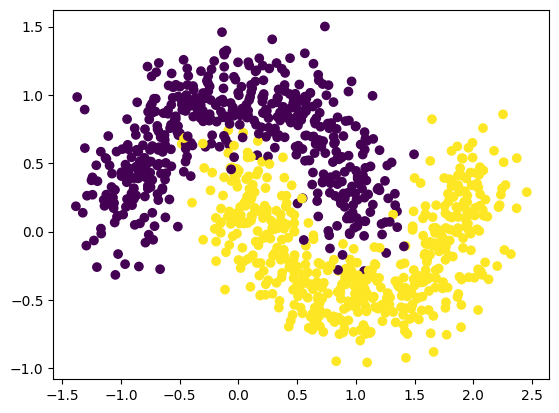

In [73]:
plt.scatter (X[:,0], X[:,1], c=y)
plt.show

Видно, что объекты двух классов пересекаются между собой.

## Разбить данные на обучающую (train) и тестовую (test) выборки в пропорции 75% - 25% соответственно.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = RANDOM_STATE)

## Отобразить на графике обучающую и тестовую выборки. Объекты разных классов должны иметь разные цвета.

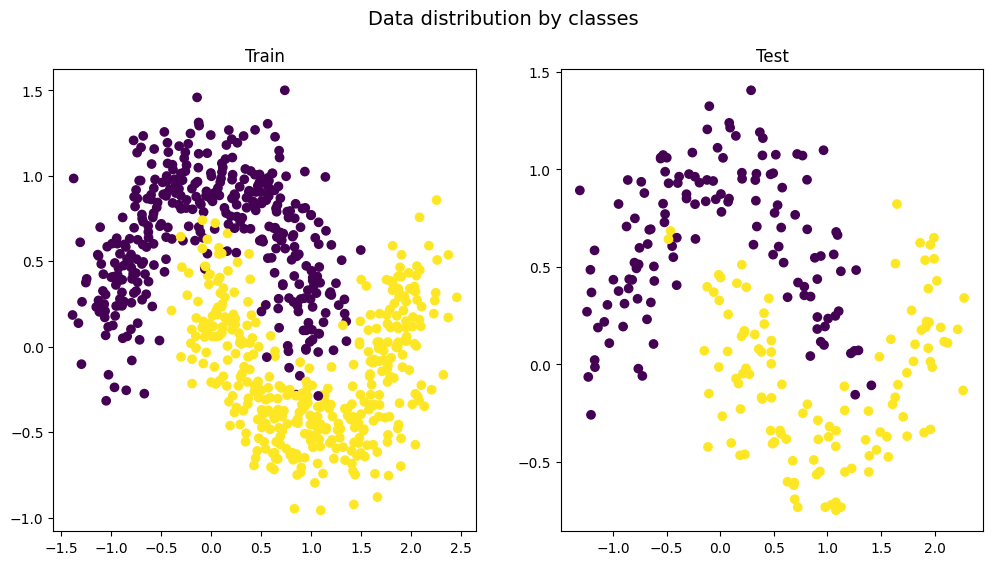

In [75]:
# create 2 subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].scatter (X_train[:,0], X_train[:,1], c=y_train)
ax[1].scatter (X_test[:,0], X_test[:,1], c=y_test)
 
# plot 2 subplots
ax[0].set_title('Train')
ax[1].set_title('Test')
 
fig.suptitle('Data distribution by classes', fontsize=14)
plt.show()

## Реализовать модели классификаторов, обучить их на обучающем множестве. Применить модели на тестовой выборке, вывести результаты классификации:

* Истинные и предсказанные метки классов
* Матрицу ошибок (confusion matrix)
* Значения полноты, точности, f1-меры и аккуратности
* Значение площади под кривой ошибок (AUC ROC)
* Отобразить на графике область принятия решений по каждому классу

In [76]:
def print_results(y_pred, y_true):
    print ('Predict: ' + str(y_pred))
    print ('Test :' + str(y_true))
    
    print ('Confusion matrix: ')
    print (confusion_matrix(y_true, y_pred))
    
    print ('Accuracy score: ', accuracy_score(y_pred, y_true))
    print(classification_report(y_true, y_pred))
    print(f'ROC AUC score: {roc_auc_score(y_true, y_pred)}')

### KNN

### Для 1 ближайшего соседа:

In [77]:
knn1 = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn1.fit(X_train, y_train)
prediction1 = knn1.predict(X_test)
print(f'Results for KNN (1 neigbours)')
print_results(prediction1, y_test)
print('-'*50)

Results for KNN (1 neigbours)
Predict: [1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0
 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0]
Test :[1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0

c:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Для 3х ближайших соседей:

In [78]:
knn3 = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
knn3.fit(X_train, y_train)
prediction3 = knn3.predict(X_test)
print(f'Results for KNN (3 neigbours)')
print_results(prediction3, y_test)
print('-'*50)


Results for KNN (3 neigbours)
Predict: [1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0]
Test :[1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0

c:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Для 9 ближайших соседей:

In [79]:
knn9 = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean')
knn9.fit(X_train, y_train)
prediction9 = knn9.predict(X_test)
print(f'Results for KNN (9 neigbours)')
print_results(prediction9, y_test)
print('-'*50)

Results for KNN (9 neigbours)
Predict: [1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0]
Test :[1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0

c:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


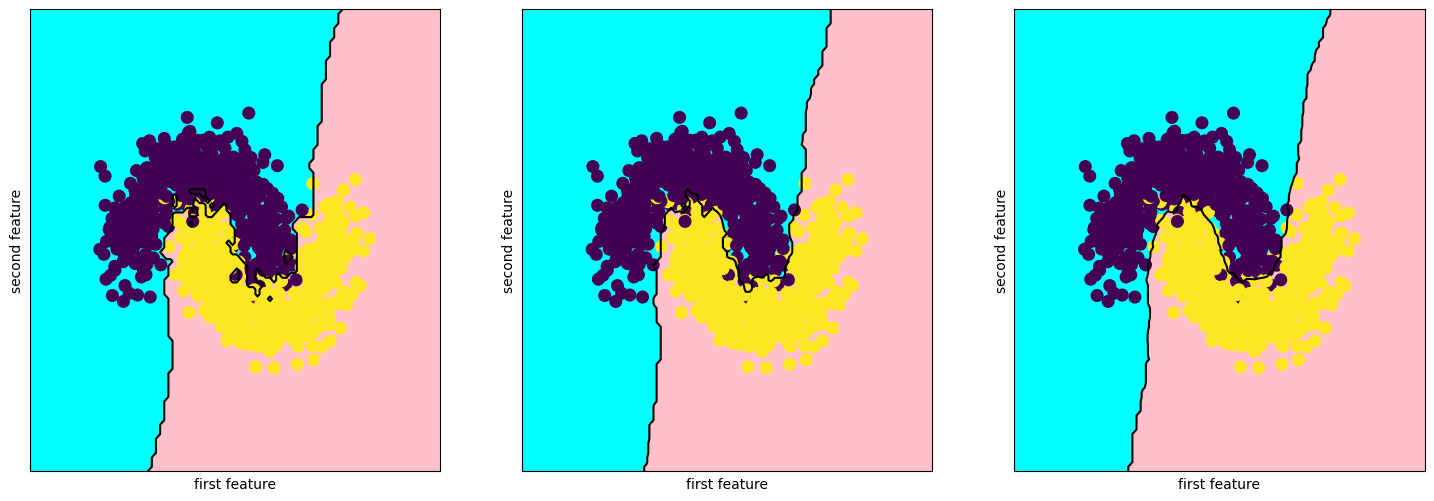

In [80]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn1, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

plt.subplot(1, 3, 2)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn3, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

plt.subplot(1, 3, 3)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn9, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

plt.show()

## Naive Bayes

In [81]:
gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)

In [82]:
print_results(gnb_pred, y_test)

Predict: [0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0
 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0
 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0]
Test :[1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 1 1 0 0 1 1 1 1 0 

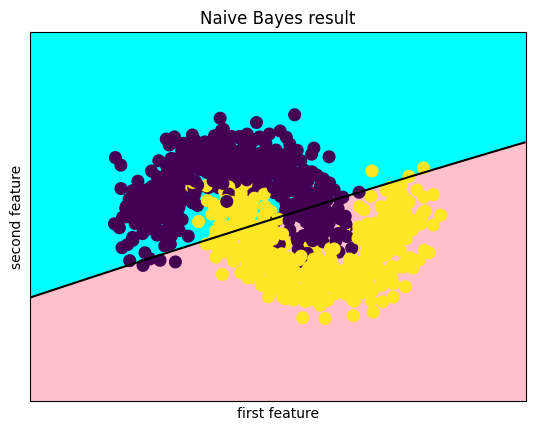

In [83]:
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.title('Naive Bayes result')

plot_2d_separator(gnb, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

## Random Forest

In [84]:
estimators = (5, 15, 50)
forests = [RandomForestClassifier(n_estimators=n) for n in estimators]

for forest in forests:
    forest.fit(X_train, y_train)

forests_pred = [forest.predict(X_test) for forest in forests]

for n, prediction in zip(estimators, forests_pred):
    print(f'Results for Random Forest ({n} estimators)')
    print_results(prediction, y_test)
    print('-'*50)

Results for Random Forest (5 estimators)
Predict: [1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0]
Test :[1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1
 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 

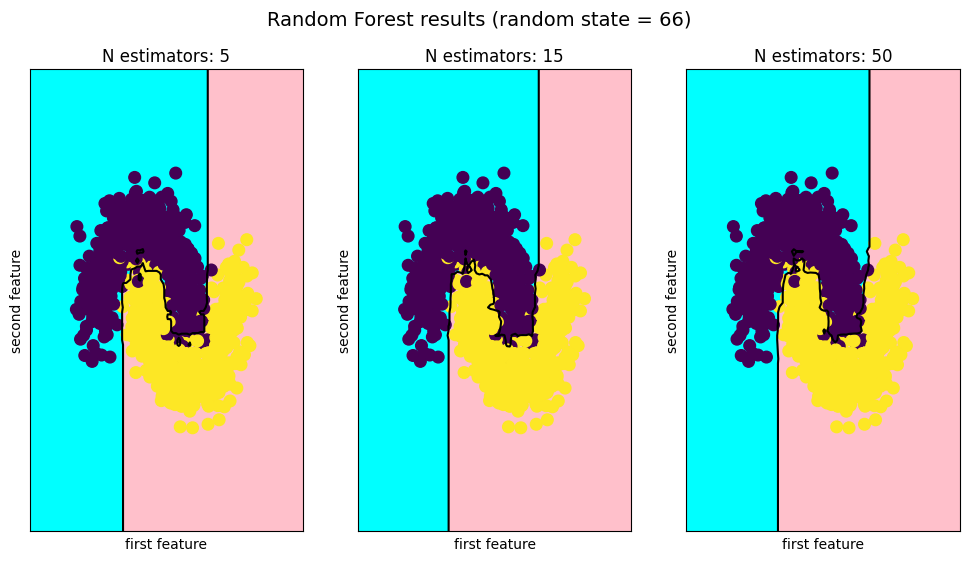

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
fig.suptitle(f'Random Forest results (random state = {RANDOM_STATE})', fontsize=14)

for i in range(3):
    axes[i].set_xlabel("first feature")
    axes[i].set_ylabel("second feature")
    axes[i].set_title(f'N estimators: {estimators[i]}')

    plot_2d_separator(forests[i], X, fill=True, ax=axes[i])
    axes[i].scatter(X[:, 0], X[:, 1], c=y, s=70)

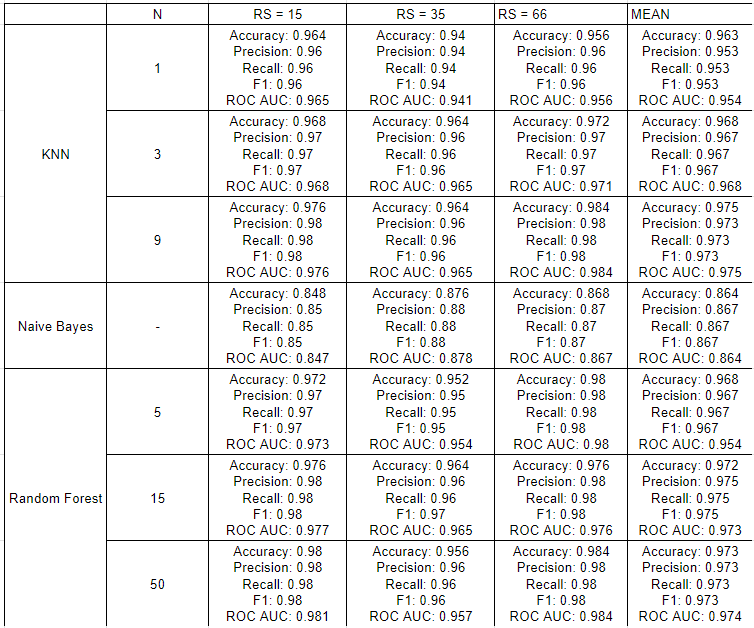

## Выводы

* **Random Forest** тяжеловесен, но показал лучшие результаты. Показатели растут с увеличением числа деревьев. Если у нас большой запас вычислительных мощностей и времени, можем использовать этот метод классификации, иначе лучше использовать другие способы - KNN не требует стадии обучения, а алгоритм Наивного Байесовского метода куда более прост в сравнении со случайным лесом.
* Если задача позволяет пожертвовать точностью классификации, можно получить весомый выигрыш в скорости, используя **метод Наивного Байеса**.
* В **методе ближайших соседей** метрики растут с увеличением числа соседей, приближаясь по точности к Случайному лесу 